In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
sys.path.append('../src/')

In [3]:
# set plotting params
import matplotlib as mpl
import plots
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.reload_library()
rcparams = plots.stdrcparams()
mpl.rcParams.update(rcparams)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

In [5]:
mimic_dir = r'../data/mimic_iv'
derived_dir = r'../data/mimiciv_derived'
out_dir = r'../data/mimiciv_included'

## pneumonia

In [6]:
d_icd_diagnoses = pd.read_csv(os.path.join(mimic_dir, 'hosp', 'd_icd_diagnoses.csv.gz'))

In [7]:
to_exclude = [
    'Pneumococcal septicemia [Streptococcus pneumoniae septicemia]', 
    'Whooping cough due to Bordetella pertussis without pneumonia', 
    'Whooping cough due to Bordetella parapertussis without pneumonia',
    'Whooping cough due to other Bordetella species without pneumonia',
    'Whooping cough, unspecified species without pneumonia',
    'Abscess of lung without pneumonia', 
    'Sepsis due to Streptococcus pneumoniae',
    'Streptococcus pneumoniae as the cause of diseases classified elsewhere',
    'Mycoplasma pneumoniae [M. pneumoniae] as the cause of diseases classified elsewhere',
    'Klebsiella pneumoniae [K. pneumoniae] as the cause of diseases classified elsewhere',
    'Acute bronchitis due to Mycoplasma pneumoniae',
    'Other specified vaccinations against streptococcus pneumoniae [pneumococcus]',
    'Need for prophylactic vaccination and inoculation against streptococcus pneumoniae [pneumococcus] and influenza',
    'Personal history of pneumonia (recurrent)', 
    'Cryptogenic organizing pneumonia', 
    'Desquamative interstitial pneumonia', 
    'Other Staphylococcus pneumonia'
]

In [8]:
f1 = d_icd_diagnoses.long_title.str.contains('pneumonia', case=False)
f2 = ~d_icd_diagnoses.long_title.isin(to_exclude)
d_icd_pneu = d_icd_diagnoses[f1&f2]

In [9]:
diagnoses_icd = pd.read_csv(os.path.join(mimic_dir, 'hosp', 'diagnoses_icd.csv.gz'))

In [10]:
icd_pneu = diagnoses_icd.merge(d_icd_pneu)

In [11]:
icd_pneu.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,10000826,20032235,2,486,9,"Pneumonia, organism unspecified"
1,10001176,23334588,1,4829,9,"Bacterial pneumonia, unspecified"
2,10001884,25758848,1,486,9,"Pneumonia, organism unspecified"
3,10002155,20345487,2,486,9,"Pneumonia, organism unspecified"
4,10002155,23822395,2,486,9,"Pneumonia, organism unspecified"


## icu

In [12]:
icustay_detail = pd.read_csv(os.path.join(derived_dir, 'icustay_detail.csv.gz'))
icustay_times = pd.read_csv(os.path.join(derived_dir, 'icustay_times.csv.gz'))

In [13]:
icustay_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73181 entries, 0 to 73180
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  73181 non-null  int64 
 1   hadm_id     73181 non-null  int64 
 2   stay_id     73181 non-null  int64 
 3   intime_hr   73163 non-null  object
 4   outtime_hr  73163 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.8+ MB


In [14]:
icustay_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73181 entries, 0 to 73180
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject_id            73181 non-null  int64  
 1   hadm_id               73181 non-null  int64  
 2   stay_id               73181 non-null  int64  
 3   gender                73181 non-null  object 
 4   dod                   28274 non-null  object 
 5   admittime             73181 non-null  object 
 6   dischtime             73181 non-null  object 
 7   los_hospital          73181 non-null  int64  
 8   admission_age         73181 non-null  int64  
 9   race                  73181 non-null  object 
 10  hospital_expire_flag  73181 non-null  int64  
 11  hospstay_seq          73181 non-null  int64  
 12  first_hosp_stay       73181 non-null  bool   
 13  icu_intime            73181 non-null  object 
 14  icu_outtime           73181 non-null  object 
 15  los_icu            

In [15]:
icustay_times.merge(icustay_detail).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73181 entries, 0 to 73180
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject_id            73181 non-null  int64  
 1   hadm_id               73181 non-null  int64  
 2   stay_id               73181 non-null  int64  
 3   intime_hr             73163 non-null  object 
 4   outtime_hr            73163 non-null  object 
 5   gender                73181 non-null  object 
 6   dod                   28274 non-null  object 
 7   admittime             73181 non-null  object 
 8   dischtime             73181 non-null  object 
 9   los_hospital          73181 non-null  int64  
 10  admission_age         73181 non-null  int64  
 11  race                  73181 non-null  object 
 12  hospital_expire_flag  73181 non-null  int64  
 13  hospstay_seq          73181 non-null  int64  
 14  first_hosp_stay       73181 non-null  bool   
 15  icu_intime         

In [16]:
icus = icustay_times.merge(icustay_detail)

In [17]:
icus = icus.merge(icd_pneu[['subject_id', 'hadm_id']].drop_duplicates())

In [18]:
icd_pneu = icd_pneu.merge(icus[['subject_id', 'hadm_id']].drop_duplicates())

## vent

In [19]:
ventilation = pd.read_csv(os.path.join(derived_dir, 'ventilation.csv.gz'))

In [20]:
ventilation = ventilation.dropna(subset='ventilation_status')

In [21]:
icus = icus.merge(ventilation[['stay_id']].drop_duplicates())
icd_pneu = icd_pneu.merge(icus[['subject_id', 'hadm_id']].drop_duplicates())
ventilation = ventilation.merge(icus[['subject_id', 'hadm_id', 'stay_id']].drop_duplicates())

## adult

In [22]:
age = pd.read_csv(os.path.join(derived_dir, 'age.csv.gz'))

In [23]:
f = age.hadm_id.isin(icus.hadm_id)
age[f].age.min()

18

<Axes: >

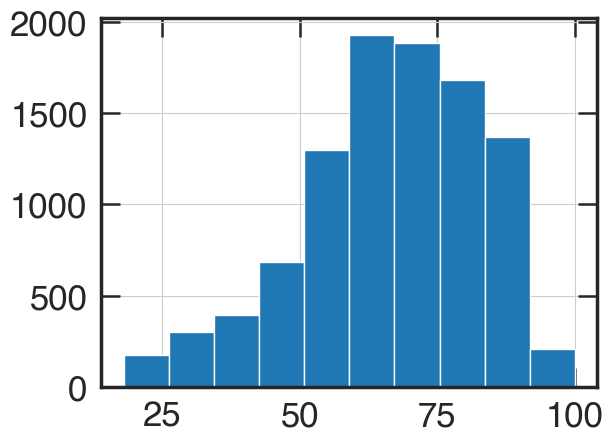

In [24]:
age[f].age.hist()

In [25]:
age = age.merge(icus[['subject_id', 'hadm_id']].drop_duplicates())

## save

In [26]:
icus.to_csv(os.path.join(out_dir, 'icus.csv'))
icd_pneu.to_csv(os.path.join(out_dir, 'icd_pneu.csv'))
ventilation.to_csv(os.path.join(out_dir, 'ventilation.csv'))
age.to_csv(os.path.join(out_dir, 'age.csv'))